In [320]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [321]:
df=pd.read_csv('CO2 file.csv')
df

,Date,Time,Indoor_CO2,Indoor_temprature,Indoor_RH,Indoor_Absolute_Humidity,Outdoor_CO2,Outdoor_temprature,Outdoor_RH,Outdoor_AH,time,Minutes
0,15-02-2023,12:00:00 AM,901,26.8,52.2,13.3,392,20.4,55.1,9.8,0.00,0
1,15-02-2024,12:15:00 AM,1069,26.8,54.0,13.7,395,20.3,55.8,9.8,0.15,15
2,15-02-2025,12:30:00 AM,1218,26.8,55.1,14.0,397,20.2,55.8,9.8,0.30,30
3,15-02-2023,12:45:00 AM,1320,26.8,55.7,14.2,392,20.1,55.2,9.6,0.45,45
4,15-02-2023,1:00:00 AM,1408,26.8,56.2,14.3,395,20.1,55.6,9.6,1.00,60
...,...,...,...,...,...,...,...,...,...,...,...,...
5712,15-04-2023,5:30:00 PM,1340,31.5,48.3,15.9,407,34.7,63.4,24.7,17.30,1050
5713,15-04-2023,5:45:00 PM,1361,32.5,51.7,17.9,432,34.6,64.6,25.0,17.45,1065
5714,15-04-2023,6:00:00 PM,1377,32.9,54.3,19.2,426,34.4,65.5,25.1,18.00,1080
5715,15-04-2023,6:15:00 PM,1406,33.1,56.5,20.2,415,34.2,65.6,24.9,18.15,1095


In [322]:
df.isnull().sum()

Date                        0
Time                        0
Indoor_CO2                  0
Indoor_temprature           0
Indoor_RH                   0
Indoor_Absolute_Humidity    0
Outdoor_CO2                 0
Outdoor_temprature          0
Outdoor_RH                  0
Outdoor_AH                  0
time                        0
Minutes                     0
dtype: int64

In [323]:
df.keys()

Index(['Date', 'Time', 'Indoor_CO2 ', 'Indoor_temprature', 'Indoor_RH',
       'Indoor_Absolute_Humidity', 'Outdoor_CO2 ', 'Outdoor_temprature',
       'Outdoor_RH', 'Outdoor_AH', 'time', 'Minutes'],
      dtype='object')

In [324]:
df_new=df[['Indoor_CO2 ', 'Indoor_temprature', 'Indoor_RH',
       'Indoor_Absolute_Humidity', 'Outdoor_CO2 ', 'Outdoor_temprature',
       'Outdoor_RH', 'Outdoor_AH','Minutes']]

In [325]:
df_new['CO2_Diff']=df['Indoor_CO2 '] - df['Outdoor_CO2 ']
df_new

,Indoor_CO2,Indoor_temprature,Indoor_RH,Indoor_Absolute_Humidity,Outdoor_CO2,Outdoor_temprature,Outdoor_RH,Outdoor_AH,Minutes,CO2_Diff
0,901,26.8,52.2,13.3,392,20.4,55.1,9.8,0,509
1,1069,26.8,54.0,13.7,395,20.3,55.8,9.8,15,674
2,1218,26.8,55.1,14.0,397,20.2,55.8,9.8,30,821
3,1320,26.8,55.7,14.2,392,20.1,55.2,9.6,45,928
4,1408,26.8,56.2,14.3,395,20.1,55.6,9.6,60,1013
...,...,...,...,...,...,...,...,...,...,...
5712,1340,31.5,48.3,15.9,407,34.7,63.4,24.7,1050,933
5713,1361,32.5,51.7,17.9,432,34.6,64.6,25.0,1065,929
5714,1377,32.9,54.3,19.2,426,34.4,65.5,25.1,1080,951
5715,1406,33.1,56.5,20.2,415,34.2,65.6,24.9,1095,991


In [328]:
file_path = r'C:\Users\good day\Desktop\My CO2 Data.xlsx'
df.to_excel(file_path, index=True)

In [68]:
print(df['Minutes'].min())
print(df['Minutes'].max())

0
1425


In [71]:
dp=df_new[['CO2_Diff','Minutes']]
dp

,CO2_Diff,Minutes
0,509,0
1,674,15
2,821,30
3,928,45
4,1013,60
...,...,...
5712,933,1050
5713,929,1065
5714,951,1080
5715,991,1095


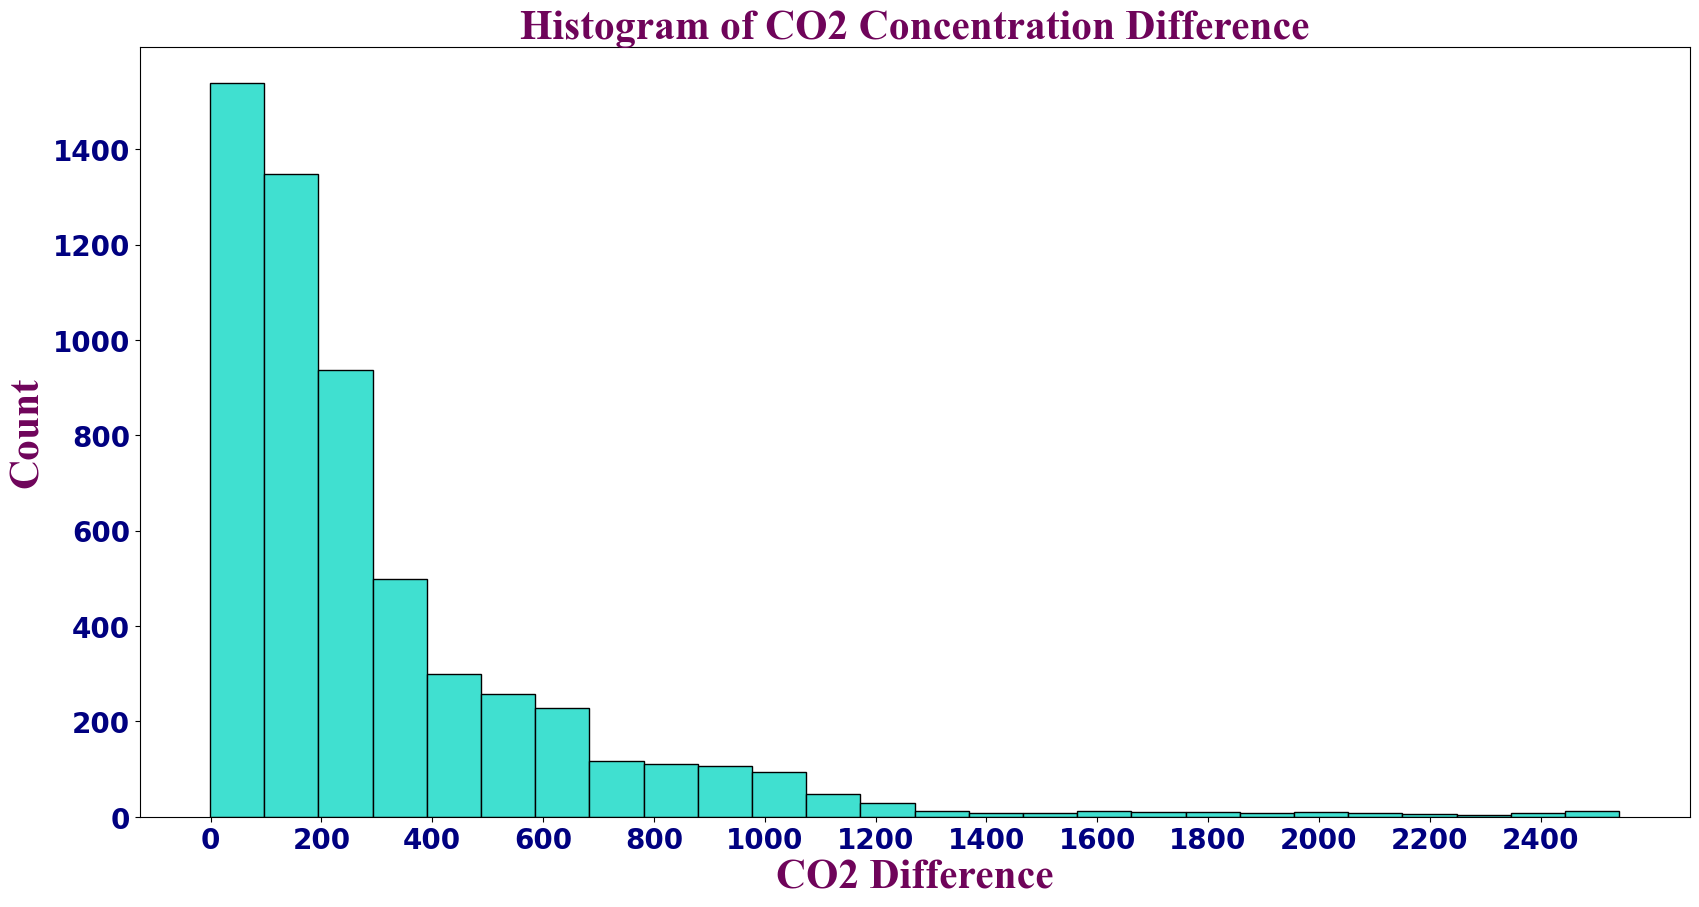

Count in the tallest bin: 1538
Number of bins: 26


In [190]:
import numpy as np
Diff= dp['CO2_Diff']
plt.figure(figsize=(20, 10))
bin_width =100
data_range = Diff.max() - Diff.min()
num_bins = int(np.ceil(data_range / bin_width))
counts, bin_edges = np.histogram(Diff, bins=num_bins,)
max_count_index = np.argmax(counts)
tallest_bin_count = counts[max_count_index]
num_bins = len(bin_edges) - 1
plt.hist(Diff, bins=num_bins,color='#40E0D0', edgecolor='black')
font1={'family':'Times New Roman','color':'#6f045a','fontweight':'bold','size':30}
plt.xlabel('CO2 Difference',fontdict=font1)
plt.ylabel('Count',fontdict=font1)
plt.yticks(np.arange(0,1500,200),color='navy',fontweight='bold',size=20)
plt.xticks(np.arange(0,2500,200),color='navy',fontweight='bold',size=20)
plt.title('Histogram of CO2 Concentration Difference',fontdict=font1)
plt.show()
print("Count in the tallest bin:", tallest_bin_count)
print("Number of bins:", num_bins)

In [221]:
X=[5048,2453,1712,848,636,509,424,364,318,283,255,232,212,196,182,170,159,150,
   142,134,128,122,116,111,106,102,98,95,91,88,85,83,80,78,73,71,69,67,66,64,63,61,
   60,58,57,56,55,53,52,51,50,49,48,47,48,45,44,43,42,41,40,39,38,37,36,35,34,33,
   32,31,30,29,28,27,26]

In [222]:
y=[41,41,73,102,136,166,184,217,247,271,290,347,341,376,424,428,443,462,492,544,576,
   599,616,631,628,643,657,647,640,675,687,635,779,823,871,904,937,970,1003,1033,1043,
   1041,1064,1060,1113,1109,1103,1102,1120,1116,1125,1132,1135,1097,1156,1143,1152,1144,
   1162,1141,1169,1168,1184,1185,1202,1207,1225,1212,1216,1260,1301,1379,1433,1500,1538]

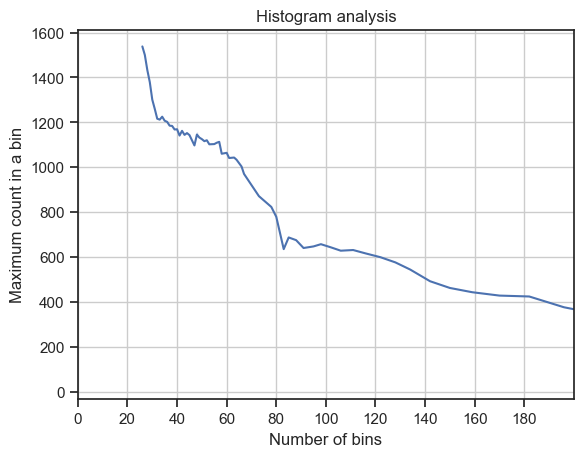

In [315]:
plt.grid(True)
sns.lineplot(x=X, y=y)
plt.xticks(np.arange(0,200,20))
plt.xlabel('Number of bins')
plt.ylabel('Maximum count in a bin')
plt.title('Histogram analysis')
plt.xlim(0,200)
plt.show()

In [308]:
from sklearn.cluster import DBSCAN
dbscan_cluster_model = DBSCAN(eps=43, min_samples=6).fit(dp)
dbscan_cluster_model

DBSCAN(eps=43, min_samples=6)

In [309]:
labels=dbscan_cluster_model.labels_
labels

array([ 0,  0,  1, ..., -1, -1, -1], dtype=int64)

In [310]:
labels_series = pd.Series(labels)
label_counts = labels_series.value_counts()
label_counts

 0    5230
-1     237
 1     213
 5       8
 3       7
 4       7
 7       6
 2       5
 6       4
dtype: int64

<Axes: xlabel='Minutes', ylabel='CO2_Diff'>

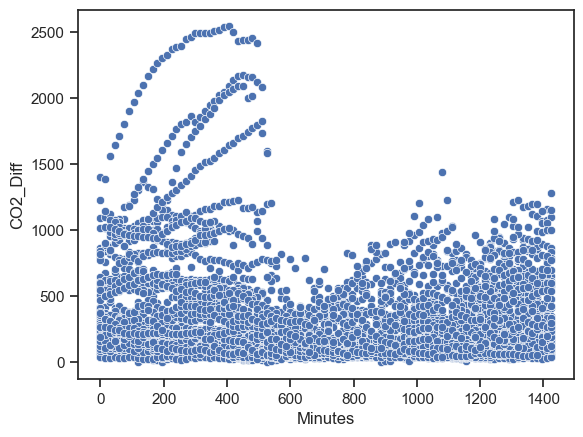

In [311]:
sns.scatterplot(y=dp['CO2_Diff'],x=dp['Minutes'])

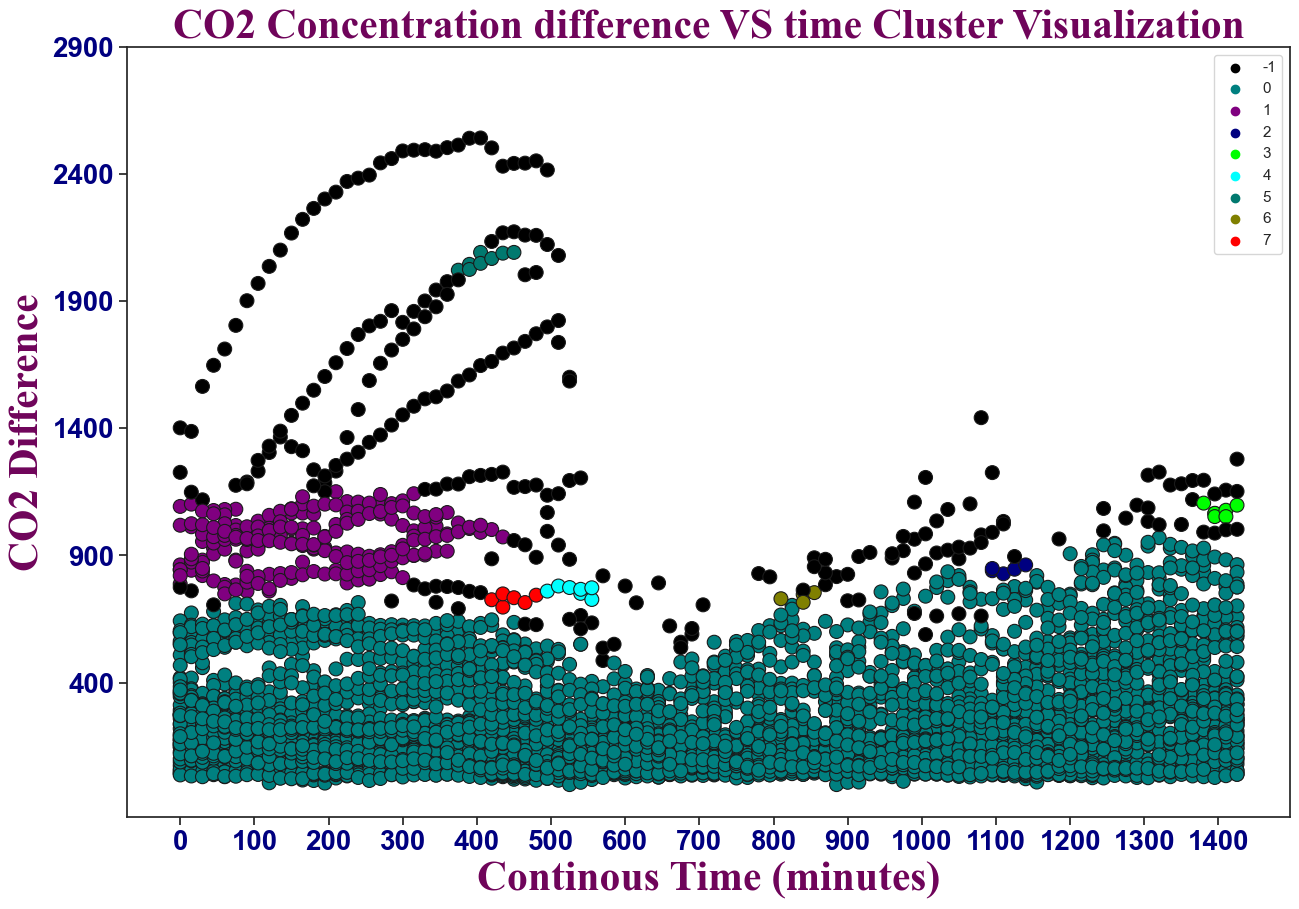

In [312]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.set(style="ticks")
custom_colors = ['black', 'teal', 'purple', 'navy', 'lime', 'aqua', '#01796f', 'olive', 'red', 'green', '#430b15', '#0b4323', '#43320b']
sns.scatterplot(x=dp['Minutes'], y=dp['CO2_Diff'], hue=labels,marker='o',s=100,edgecolor='k',palette=custom_colors)
plt.yticks(np.arange(400,3000,500),color='navy',fontweight='bold',size=20)
plt.xticks(np.arange(0,1500,100),color='navy',fontweight='bold',size=20)
font1={'family':'Times New Roman','color':'#6f045a','fontweight':'bold','size':30}
font2={'family':'Times New Roman','color':'#6f045a','fontweight':'bold','size':30}
plt.xlabel('Continous Time (minutes)',fontdict=font1)
plt.ylabel('CO2 Difference',fontdict=font2)
plt.title('CO2 Concentration difference VS time Cluster Visualization',fontdict=font1)
plt.show()

In [313]:
index_cluster_map = {}
for index, label in enumerate(labels):
    if label in index_cluster_map:
        index_cluster_map[label].append(index)
    else:
        index_cluster_map[label] = [index]

# Print the indices belonging to each cluster
for cluster_label, indices in index_cluster_map.items():
    print("Cluster {}: {}".format(cluster_label, indices))

Cluster 0: [0, 1, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 250, 251, 252, 253, 254, 259, 260, 261, 262, 26